## Plots the results of the subsystems enrichment analysis

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

## Basic settings

In [46]:
require_biomass = False
folder_enrich = "enrichment\\biomass" if require_biomass else "enrichment\\no_biomass"

## Helpers for plotting

In [47]:
myColors = ((53/255, 96/255, 149/255, 1.0), (1.0, 1.0, 1.0, 1.0), (167/255, 56/255, 44/255, 1.0))
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

In [48]:
def make_plot(df, enrichment_folder, file_name):
    ax1 = sns.heatmap(df, 
                cmap=cmap, 
                vmin=-1,
                vmax=1,
                yticklabels=True, 
                cbar=False,
                #cbar_kws={'ticks': [-1, 0, 1], 'tickslabels':['down-regulated', 'unchanged', 'up-regulated']},
                linewidths = 2)
    #cbar = ax1.figure.colorbar(ax1.collections[0])
    #cbar.set_ticks([-1, 0, 1])
    #cbar.set_ticklabels(['down-regulated', 'unchanged', 'up-regulated'])

    

    ax1.xaxis.set_ticks_position('top')

    #for item in ax1.get_yticklabels():
    #    item.set_rotation(30)

    for item in ax1.get_xticklabels():
        item.set_rotation(90)
    
    fig = plt.gcf()
    x,y = fig.get_size_inches()
    
    fig.set_size_inches(5,(df.shape[0]/90)*20)
    
    ax1.set_ylabel("")
    
    plt.savefig(enrichment_folder+'\\'+file_name+'.pdf', bbox_inches = 'tight')  
    plt.show()
    

## Data

In [49]:
df = pd.read_csv(f"{folder_enrich}\\subsystems.csv")

### Up/Down

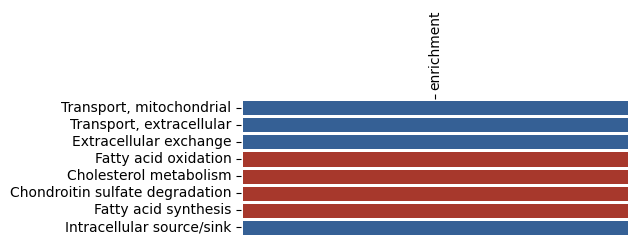

In [55]:
df_to_plot = df[['subsystem', 'enrichment']]
df_to_plot = df_to_plot[df_to_plot.enrichment != 0]
df_to_plot = df_to_plot.set_index("subsystem")
make_plot(df_to_plot, folder_enrich, "up_down_selected")

## Changed

In [56]:
#df_to_plot = df[['subsystem', 'changed']]
#df_to_plot = df_to_plot.set_index("subsystem")
#make_plot(df_to_plot, folder_enrich, "changed")